# Twitter-Bitcoin Correlation Analysis

## 1. Correlation with Sentimental Data & Price of Bitcoin

- Bitcoin 가격과 김도영 학우가 만든 전처리기, 감성분석기를 이용해 상관관계를 확인하기 전 데이터에 대한 분석을 진행하였습니다. 

### 1.1 필요한 라이브러리 import

In [1]:
# nltk 활용을 위한 불용어 다운로드
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kimjuwon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
from sentimentalAnalysis import sentimental_analysis
import matplotlib.pyplot as plt
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from coincrawler import coin_crawl_his
from data_pipeline import coin_data_pipeline
from data_concat import data_concat
from Greed_Fear_Model import Greed_Fear_Model
import statsmodels.api as sm 
import numpy as np

### 1.2 필요한 데이터 로드 

- Bitcoin_tweet.csv 파일을 로드하고 해당 어트리뷰트는 무엇인지 데이터 수 등 파악
- 'text'라는 컬럼부분을 'tweet'으로 바꿈 
- 데이터를 파악하여 칼럼 값에 결측치가 있는 것을 확인하였음. 결측치가 있을 경우 학습이 안될 가능성이 높고, compile이 되지 않을 가능성이 높으므로 해당값을 제거해주는 방식으로 코딩을 진행하였음

## ETH 데이터 모델링 ( Target  : 'target_close')

In [3]:
train_data = pd.read_csv('twitter_dataset.csv').drop('Unnamed: 0',axis=1)
train_data

,close,count,flair_avg,flair_sum,follower_number_avg,follower_number_sum,following_number_avg,following_number_sum,high,likes_avg,...,target_market cap,target_open,target_vol,textblob_avg,textblob_sum,tweet_length,vader_avg,vader_sum,vol,date
0,-0.834088,-1.162789,-1.056379,-0.376469,-1.072859,-1.072859,1.227984,-1.060005,-0.927379,-0.137619,...,-0.779133,-0.834254,1.662144,-1.601728,-1.138748,-1.182562,-1.535078,-1.119193,1.033283,2021-02-05
1,-0.711882,-1.068993,-1.235151,-0.545274,-1.015768,-1.015768,-0.314583,-1.018168,-0.649014,-0.338438,...,-0.818141,-0.713469,1.357839,-1.158831,-1.069072,-1.122227,-1.415935,-1.068959,1.734918,2021-02-06
2,-0.751383,-1.083678,-0.535172,-0.391719,-1.045025,-1.045025,-0.100330,-1.021493,-0.779103,-0.147790,...,-0.028745,-0.752944,3.236651,0.142859,-1.037176,-1.127292,-1.392941,-1.075469,1.413791,2021-02-07
3,0.043167,-0.928713,-0.736080,-0.597182,-0.812995,-0.812995,-0.328227,-0.904136,-0.079952,0.256561,...,0.002283,0.039924,2.732172,-1.227601,-0.980785,-1.033034,-1.117558,-0.975328,3.396462,2021-02-08
4,0.074177,-1.005514,-0.710590,-0.507052,-0.917393,-0.917393,-0.082401,-0.952532,0.111223,0.417199,...,-0.166597,0.070861,2.496644,-1.380534,-1.037433,-1.078297,-1.222505,-1.025534,2.864096,2021-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,-0.541904,1.894998,0.335520,-0.157058,1.384053,1.384053,0.067868,1.687080,-0.634168,0.533864,...,-0.441939,-0.542038,-0.741982,0.667252,1.909231,1.813030,0.217156,1.598256,-0.338946,2022-04-18
138,-0.468197,1.993235,0.698866,1.070373,1.490971,1.490971,-0.206844,1.573259,-0.561233,-0.093481,...,-0.455878,-0.468862,-0.610535,1.432367,2.449276,2.012100,0.723046,2.056435,-0.802109,2022-04-19
139,-0.482182,-0.619079,0.618422,-0.029962,-0.579661,-0.579661,-0.447369,-0.668518,-0.513079,0.493986,...,-0.549225,-0.483009,-0.215970,0.869339,-0.540314,-0.624177,-0.013668,-0.636935,-0.663395,2022-04-20
140,-0.574462,0.516362,0.138831,-0.553187,0.701472,0.701472,-0.715335,0.120478,-0.431578,0.770656,...,-0.635999,-0.574881,-0.600496,0.361420,0.456422,0.489720,-0.174005,0.233722,-0.247019,2022-04-21


In [21]:
vader_textblob_ethereum_train_data = pd.read_csv('vader_textblob_ethereum_train_data',lineterminator='\n').drop('Unnamed: 0',axis=1)
flair_ethereum_train_data = pd.read_csv('flair_ethereum_train_data.csv',lineterminator='\n').drop('Unnamed: 0',axis=1)
ethereum_train_data = pd.read_csv('ethereum_train_data',lineterminator='\n').drop('Unnamed: 0',axis=1)
vader_textblob_ethereum_test_data = pd.read_csv('vader_textblob_ethereum_test_data',lineterminator='\n').drop('Unnamed: 0',axis=1)
flair_ethereum_test_data = pd.read_csv('flair_ethereum_test_data.csv',lineterminator='\n').drop('Unnamed: 0',axis=1)
ethereum_test_data = pd.read_csv('ethereum_test_data',lineterminator='\n').drop('Unnamed: 0',axis=1)

/var/folders/ny/2kfd2px527g1pqq7b25smqgr0000gn/T/ipykernel_51675/126221872.py:6: DtypeWarning: Columns (2,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ethereum_test_data = pd.read_csv('ethereum_test_data',lineterminator='\n').drop('Unnamed: 0',axis=1)


In [24]:
flair_ethereum_train_data = flair_ethereum_train_data.rename(columns={'flair\r':'flair'})

In [25]:
flair_ethereum_train_data

,date,tweet,clean_text,flair
0,2022-04-13 03:20:24+00:00,@NFTshills @BountyHunterNFT \n✅Improved stakin...,Improved staking is imminent weekly items that...,0.954571
1,2022-04-13 03:22:23+00:00,@BinanceES Según .@avalancheavax y .@Ethereum ...,Segn y Pero hay fuertes competidores en el sec...,0.766990
2,2022-04-13 03:23:06+00:00,@KevinSusanto @projectPXN @AlphaGangGang @ajnf...,_eth _iel,0.945252
3,2022-04-13 03:24:00+00:00,"@Grey_Shadowz @virginfty @NTrader27 I see, I s...",_Shadowz I see I see definitely do not have 17...,-0.984696
4,2022-04-13 03:24:27+00:00,@_RocketNFT 0x9708A9b401D97652aAc4a9A3A9071a11...,@_RocketNFT 0x9708A9b401D97652aAc4a9A3A9071a11...,0.984401
...,...,...,...,...
127173,2022-04-27 23:59:18+00:00,@Kuxsy_eth 0x8138bFEc2C0ce92851D0baA4712314b78...,_eth 0x8138bFEc2C0ce92851D0baA4712314b78cF1Fa94,0.970217
127174,2022-04-27 23:59:39+00:00,Big4noreason77 found #ethereum in a Blue vault...,Big 4noreason77 found in a Blue vault at this ...,0.995327
127175,2022-04-27 23:59:43+00:00,@90BE90 @alienfrens @GAMEofDWARFS @Nighty_ntnt...,_ntnt _eth,-0.943263
127176,2022-04-27 23:59:54+00:00,Sploopologist found #ethereum in a Blue vault ...,Sploopologist found in a Blue vault at this lo...,0.997613


In [26]:
gfmodel = Greed_Fear_Model(ethereum_train_data,ethereum_test_data)

In [27]:
coin =  gfmodel.coin_data_load('ethereum')

  0%|          | 0/2477 [00:00<?, ?it/s]

In [28]:
gfmodel.convert_train_data(vader_textblob_ethereum_train_data,flair_ethereum_train_data)
gfmodel.convert_test_data(vader_textblob_ethereum_test_data,flair_ethereum_test_data)

(127178, 11)
(127178, 12)
date                0
user_id             0
user_name           0
user_screen_name    0
tweet               0
retweets            0
likes               0
follower_number     0
following_number    0
vader               0
textblob            0
flair               0
dtype: int64


  0%|          | 0/127178 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

date                0
user_id             0
user_name           0
user_screen_name    0
tweet               0
retweets            0
likes               0
follower_number     0
following_number    0
vader               0
textblob            0
flair               0
dtype: int64


  0%|          | 0/299623 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

,date,tweet_length,vader_sum,vader_avg,textblob_sum,textblob_avg,flair_sum,flair_avg,following_number_sum,following_number_avg,...,close,vol,market cap,target_date,target_open,target_high,target_low,target_close,target_vol,target_market cap
0,2022-04-28,624814,840.2293,0.122966,644.576859,0.094333,1477.601967,0.216245,9955333,1456.949071,...,2936.94,1.844352e+10,3.541000e+11,2022-04-29,2936.78,2943.45,2782.44,2815.60,1.877104e+10,3.395082e+11
1,2022-04-29,1867742,2219.4867,0.112905,1601.129001,0.081449,2703.261095,0.137515,27437042,1395.718893,...,2815.60,1.877104e+10,3.395082e+11,2022-04-30,2815.53,2836.83,2727.41,2730.19,1.352094e+10,3.292457e+11
2,2022-04-30,1288909,1549.2784,0.112340,1161.683585,0.084235,1475.989974,0.107026,20497338,1486.283663,...,2730.19,1.352094e+10,3.292457e+11,2022-05-01,2729.99,2838.70,2728.08,2827.76,1.533273e+10,3.410499e+11
3,2022-05-01,1949185,1697.2035,0.085342,1277.034196,0.064215,-671.570684,-0.033769,28327389,1424.417408,...,2827.76,1.533273e+10,3.410499e+11,2022-05-02,2827.61,2874.15,2785.52,2857.41,1.860974e+10,3.446642e+11
4,2022-05-02,2032228,1970.7241,0.096302,1494.866210,0.073049,-926.710731,-0.045285,26340960,1287.185301,...,2857.41,1.860974e+10,3.446642e+11,2022-05-03,2857.15,2859.19,2762.12,2783.48,1.302609e+10,3.357834e+11
5,2022-05-03,1653465,1871.6165,0.103956,1428.548942,0.079346,2324.066547,0.129086,25760115,1430.799545,...,2783.48,1.302609e+10,3.357834e+11,2022-05-04,2783.13,2956.69,2779.27,2940.64,1.818675e+10,3.547820e+11
6,2022-05-04,1060578,1340.2797,0.119593,931.726447,0.083138,1411.033793,0.125906,14802703,1320.844383,...,2940.64,1.818675e+10,3.547820e+11,2022-05-05,2940.23,2948.96,2704.92,2749.21,2.264293e+10,3.317224e+11
7,2022-05-05,1279898,1750.0692,0.125787,1351.130148,0.097113,2442.902436,0.175584,22457700,1614.152232,...,2749.21,2.264293e+10,3.317224e+11,2022-05-06,2748.93,2754.84,2645.34,2694.98,2.102760e+10,3.252142e+11
8,2022-05-06,1434252,1902.7064,0.126577,1358.970282,0.090405,1820.890029,0.121134,20979453,1395.652807,...,2694.98,2.102760e+10,3.252142e+11,2022-05-07,2694.99,2696.65,2599.52,2636.09,1.336928e+10,3.181430e+11
9,2022-05-07,1517903,2061.8866,0.128965,1453.493792,0.090912,3253.905486,0.203522,25408219,1589.205592,...,2636.09,1.336928e+10,3.181430e+11,2022-05-08,2636.12,2638.83,2498.43,2517.46,2.080227e+10,3.038590e+11


In [29]:
gfmodel.train_normalize()
gfmodel.test_normalize()

,tweet_length,vader_sum,vader_avg,textblob_sum,textblob_avg,flair_sum,flair_avg,following_number_sum,following_number_avg,likes_sum,...,close,vol,market cap,target_open,target_high,target_low,target_close,target_vol,target_market cap,date
0,-1.898213,-1.870226,0.816063,-1.695217,1.088891,-0.238617,1.468804,-1.622854,-0.297969,-1.922416,...,1.139543,-0.462237,1.136519,1.139322,1.069927,0.984486,0.934060,-0.405995,0.930600,2022-04-28
1,0.407031,0.446111,0.011761,0.245677,-0.386565,0.744942,0.366448,0.082492,-0.812421,-0.260818,...,0.791033,-0.431307,0.788011,0.791294,0.732629,0.835210,0.686267,-0.895379,0.683032,2022-04-29
2,-0.666524,-0.679442,-0.033421,-0.645981,-0.067546,-0.239911,-0.060448,-0.594478,-0.051501,-0.654147,...,0.545720,-0.927114,0.542902,0.545765,0.738545,0.837027,0.969339,-0.726494,0.967789,2022-04-30
3,0.558082,-0.431016,-2.191587,-0.411928,-2.360304,-1.963271,-2.031811,0.169345,-0.571298,0.542201,...,0.825958,-0.756013,0.824832,0.825967,0.850693,0.992841,1.055360,-0.421030,1.054979,2022-05-01
4,0.712101,0.028337,-1.315477,0.030064,-1.348617,-2.168015,-2.193049,-0.024431,-1.724314,-0.079857,...,0.911119,-0.446540,0.911156,0.910757,0.803366,0.929366,0.840873,-0.941506,0.840743,2022-05-02
5,0.009614,-0.138105,-0.703652,-0.104497,-0.627407,0.440648,0.248436,-0.081093,-0.517675,0.158239,...,0.698778,-0.973846,0.699047,0.698295,1.111812,0.975887,1.296828,-0.460459,1.299054,2022-05-03
6,-1.090007,-1.030437,0.546403,-1.112576,-0.193176,-0.292036,0.203915,-1.149992,-1.441512,-0.899030,...,1.150170,-0.486486,1.152807,1.149224,1.087358,0.774203,0.741448,-0.045080,0.742779,2022-05-04
7,-0.683237,-0.342233,1.041511,-0.261584,1.407244,0.536011,0.899485,-0.403244,1.022843,-1.059215,...,0.600349,-0.065656,0.602056,0.600129,0.473249,0.612584,0.584115,-0.195651,0.585778,2022-05-05
8,-0.396958,-0.085892,1.104699,-0.245676,0.639078,0.036862,0.137096,-0.547448,-0.812976,-0.140541,...,0.444590,-0.218203,0.446614,0.445304,0.289162,0.488291,0.413263,-0.909516,0.415196,2022-05-06
9,-0.241812,0.181436,1.295561,-0.053882,0.697071,1.186820,1.290658,-0.115420,0.813243,-0.202091,...,0.275447,-0.941437,0.277726,0.276327,0.106245,0.214070,0.069092,-0.216655,0.070619,2022-05-07


In [30]:
from data_concat import data_concat

d_concat = data_concat()
gfmodel.normed_train_data = d_concat.concat([gfmodel.normed_train_data, train_data])

  0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
gfmodel.make_model()

In [32]:
result = gfmodel.predict()
result

/Users/kimjuwon/Desktop/twitter_sentimental_analysis/Greed_Fear_Model.py:417: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  result['correct'] = pd.Series()
/Users/kimjuwon/Desktop/twitter_sentimental_analysis/Greed_Fear_Model.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['correct'].iloc[i] =True


,target_close,predict_close,date,vol,close,target_date,Greed_Fear_Score,difference,correct
0,2866.544701,2815.60,2022-04-28,1.844352e+10,2936.94,2022-04-29,-41.315110,-70.395299,True
1,2754.360135,2730.19,2022-04-29,1.877104e+10,2815.60,2022-04-30,-30.334565,-61.239865,True
2,2670.437872,2827.76,2022-04-30,1.352094e+10,2730.19,2022-05-01,35.737440,-59.752128,False
3,2777.899178,2857.41,2022-05-01,1.533273e+10,2827.76,2022-05-02,10.485331,-49.860822,False
4,2790.304519,2783.48,2022-05-02,1.860974e+10,2857.41,2022-05-03,-25.873081,-67.105481,True
5,2734.366541,2940.64,2022-05-03,1.302609e+10,2783.48,2022-05-04,56.461695,-49.113459,False
6,2862.145325,2749.21,2022-05-04,1.818675e+10,2940.64,2022-05-05,-65.098074,-78.494675,True
7,2680.454617,2694.98,2022-05-05,2.264293e+10,2749.21,2022-05-06,-19.725667,-68.755383,True
8,2620.964315,2636.09,2022-05-06,2.102760e+10,2694.98,2022-05-07,-21.851739,-74.015685,True
9,2573.513678,2517.46,2022-05-07,1.336928e+10,2636.09,2022-05-08,-45.002257,-62.576322,True


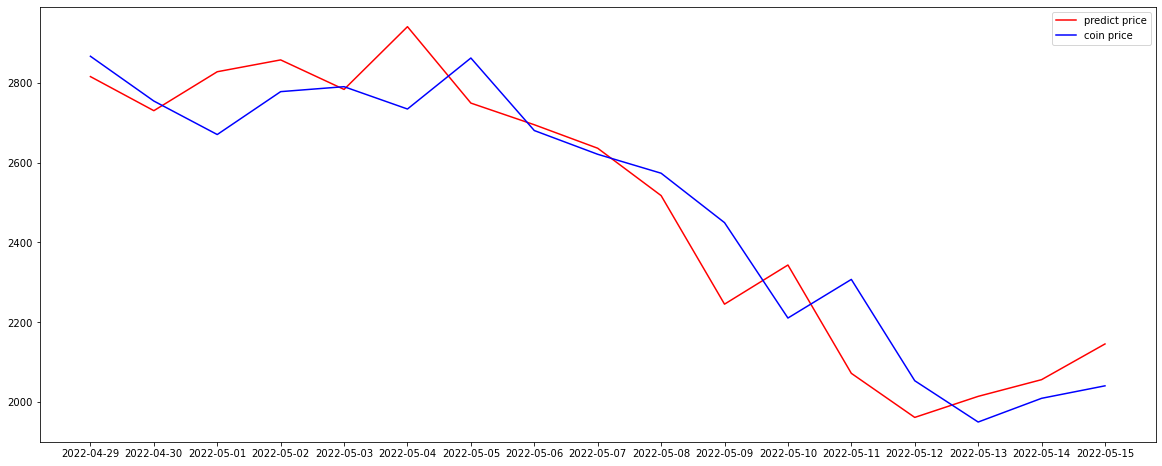

In [33]:
gfmodel.visualize()

In [34]:
result.to_csv('ETH_result_data')
gfmodel.save_csv('ETH_Visulize_data.csv')